In [1]:
import os
import pandas as pd
from config_file import data_path


In [2]:
df_sessions = pd.read_csv(os.path.join(data_path, 'sessions_timestamp_track.csv'))
df_sessions.head()

,timestamp,track_id
0,2020-10-21 20:41:02.953054,46JGVfEEiBScTaiP3Bnh27
1,2020-10-21 20:42:01.245054,6s8q3fQNcayP7yEFpuF3wz
2,2020-10-21 20:45:17.538054,3gs2PO5BKRG9oVUDvi59b2
3,2020-10-21 20:49:23.591054,0eNGwmFaIeEKQgudTcs1rV
4,2020-10-21 20:55:47.137054,2ifYUfvMNbXQDPJEyk68rP


In [3]:
df_sessions.shape

(13741737, 2)

23'613'691

13'741'737

In [4]:
df_tracks = pd.read_csv(os.path.join(data_path, 'tracks_ids.csv'))
df_tracks.head()

,id,id_artist
0,6C0WWu7RYKbAgWUI3YC0sT,7u710e44HW3K7A5eTnRqHC
1,4q7EBRq8ncztC2PRmEC7Fy,3sFhA6G1N0gG1pszb6kk1m
2,7cNyONpVADZVrW9xe3qq4z,7IAXZaLTb6nkJr8RmVPn5y
3,1bKRTzTFz7wHMxpgZSuPR1,5bOsFzuJ6QZMr86ezC4oXY
4,56OEjuyZ3AROnv4aR1XqhD,6zJ7WZkyTNmB1bFdmHH2k9


In [5]:
df_tracks.rename(columns={'id': 'track_id'}, inplace=True)
df_tracks.head()

,track_id,id_artist
0,6C0WWu7RYKbAgWUI3YC0sT,7u710e44HW3K7A5eTnRqHC
1,4q7EBRq8ncztC2PRmEC7Fy,3sFhA6G1N0gG1pszb6kk1m
2,7cNyONpVADZVrW9xe3qq4z,7IAXZaLTb6nkJr8RmVPn5y
3,1bKRTzTFz7wHMxpgZSuPR1,5bOsFzuJ6QZMr86ezC4oXY
4,56OEjuyZ3AROnv4aR1XqhD,6zJ7WZkyTNmB1bFdmHH2k9


In [6]:
df_tracks.columns, df_sessions.columns

(Index(['track_id', 'id_artist'], dtype='object'),
 Index(['timestamp', 'track_id'], dtype='object'))

In [17]:
df_session_artist = df_sessions.merge(df_tracks, on='track_id')
df_session_artist = df_session_artist[['timestamp', 'id_artist']]

In [18]:
df_session_artist.head()

,timestamp,id_artist
0,2020-10-21 20:41:02.953054,3WrFJ7ztbogyGnTHbHJFl2
1,2021-11-13 12:44:57.412048,3WrFJ7ztbogyGnTHbHJFl2
2,2022-01-15 04:24:33.756178,3WrFJ7ztbogyGnTHbHJFl2
3,2022-04-23 00:54:15.696817,3WrFJ7ztbogyGnTHbHJFl2
4,2022-05-10 13:27:02.447994,3WrFJ7ztbogyGnTHbHJFl2


In [19]:
df_session_artist.shape

(13741714, 2)

In [8]:
df_artists = pd.read_csv(os.path.join(data_path, 'artists_ids.csv'))

In [20]:
len(df_session_artist['id_artist'].unique()), len(df_artists['id'].unique())

(794, 27650)

In [10]:
# plot the number of session per artist
session_counts = df_session_artist['id_artist'].value_counts()
df_session_counts = pd.DataFrame(session_counts)
df_session_counts

,count
id_artist,
4AK6F7OLvEQ5QYCBNiQWHq,280516
15UsOTVnJzReFVN1VCnxy4,210671
1dfeR4HaWDbWqFHLkxsg1d,189387
711MCceyCBcFnzjGY4Q7Un,172201
08GQAI4eElDnROBrJRGE0X,158724
...,...
2gFsmDBM0hkoZPmrO5EdyO,521
1uFixbBAduJkFAeRKznkvW,520
5MlEt7qqXqNSReeX76xK6b,517


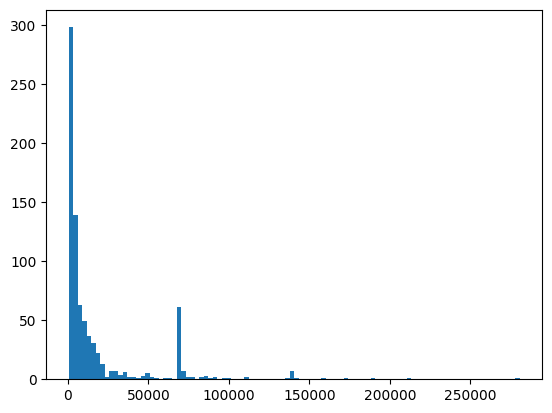

In [11]:

session_counts_list = df_session_counts['count'].tolist()
# hist plot session counts list
import matplotlib.pyplot as plt
plt.hist(session_counts_list, bins=100)
plt.show()

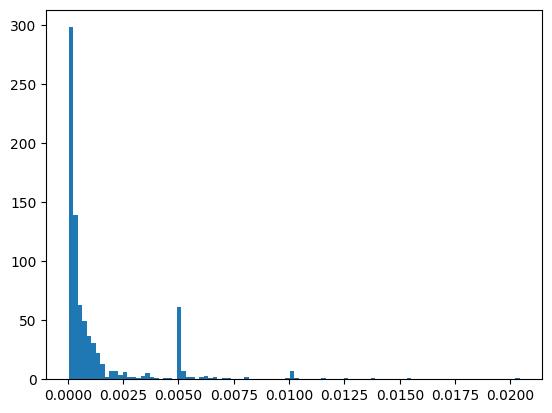

In [12]:
# normalize session counts list and plot
import numpy as np
session_counts_list_norm = np.array(session_counts_list)
session_counts_list_norm = session_counts_list_norm / session_counts_list_norm.sum()
plt.hist(session_counts_list_norm, bins=100)
plt.show()

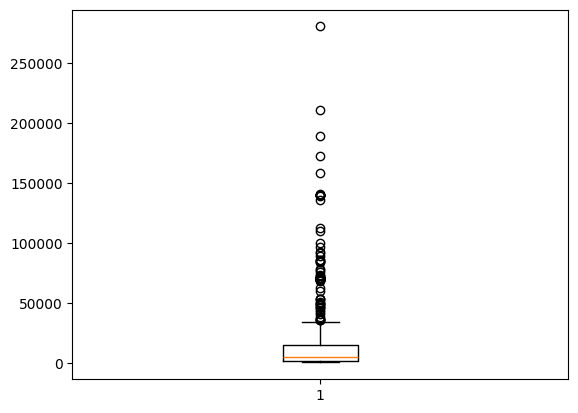

In [13]:
# box plot session counts list
plt.boxplot(session_counts_list)
plt.show()

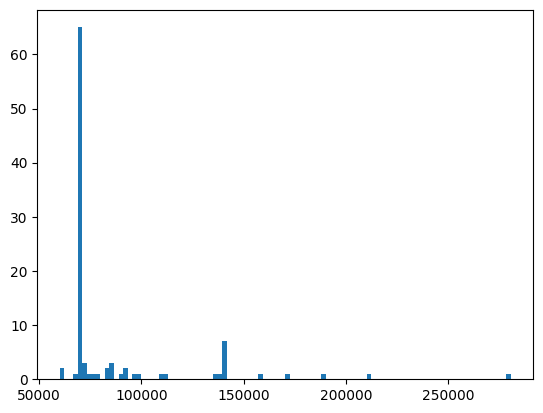

In [14]:
plt.hist(session_counts_list[:100], bins=100)
plt.show()

## summary
1. (794, 27650) - arists played in sessions and artists in the dataset
2. most of artists are played sporadically